# Exploração dos Dados

Carregue a base de dados e explore suas características

Analise estatísticas descritivas e visualize distribuições relevantes

### Carregamento da base

Fonte dos dados: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import pandas as pd

df = pd.read_csv('insurance.csv')

print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
# Print da quantidade de linhas:

row_count = len(df)
print("Linhas:", row_count)

Linhas: 1338


### Verificação de inconsistências

In [3]:
# Verifica inconsistências
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Analise Descritiva

In [4]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Na análise descritiva acima, podemos verificar algumas informações para cada coluna:

    1 - Médida dos valores
    2 - Desvio médio
    3 - Menor valor
    4 - Percentil 25%
    5 - Percentil 50%
    6 - Percentil 75%
    7 - Valor máximo

### Visualização de Distribuições

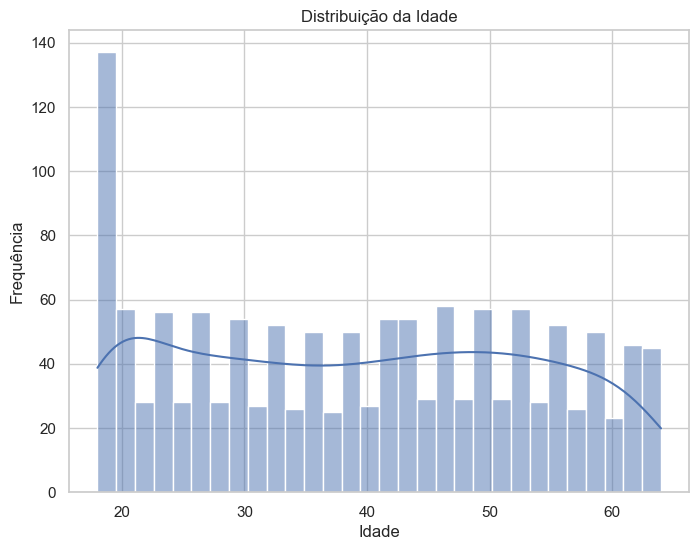

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histograma da idade
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Com o histograma acima, podemos analisar que em nossa base existe uma quantidade maior de pessoas que possuem menos de 20 anos. Para os demais anos, podemos averiguar que é uma base relativamente bem distribuída.

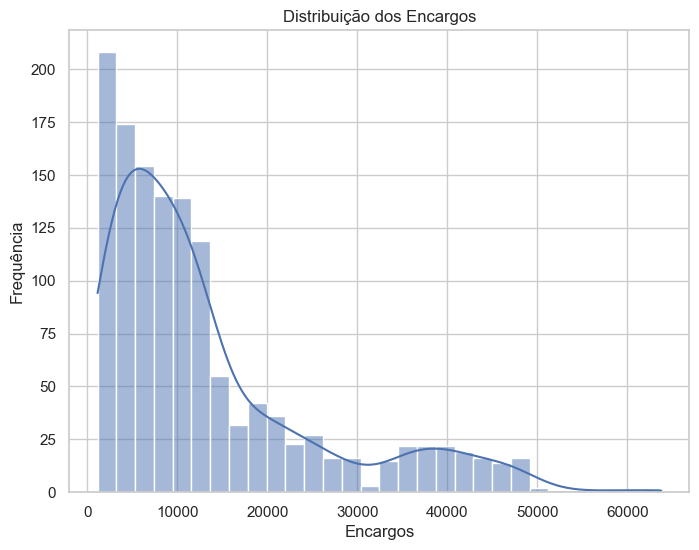

In [6]:
# Histograma dos encargos
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribuição dos Encargos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.show()

Com a distribuição dos encargos, podemos notar que a maior parte dos custos, encontra-se em valores menores e a frequência vai diminuindo conforme os valores aumentam. Talvez, por custos maiores significarem doenças mais graves e menos frequentes. Ou seja, temos um público relativamente saudável.

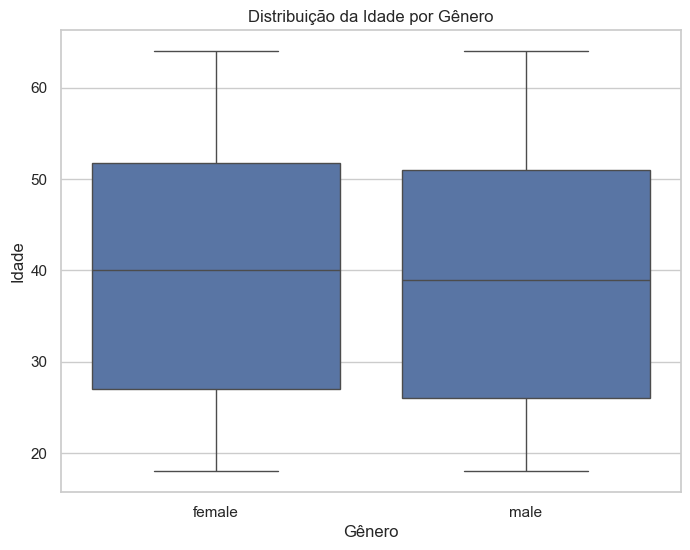

In [7]:
# Boxplot da idade por gênero
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Distribuição da Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()

Analisando o gráfico acima, podemos notar que o público feminino é ligeiramente mais velho que o masculino.

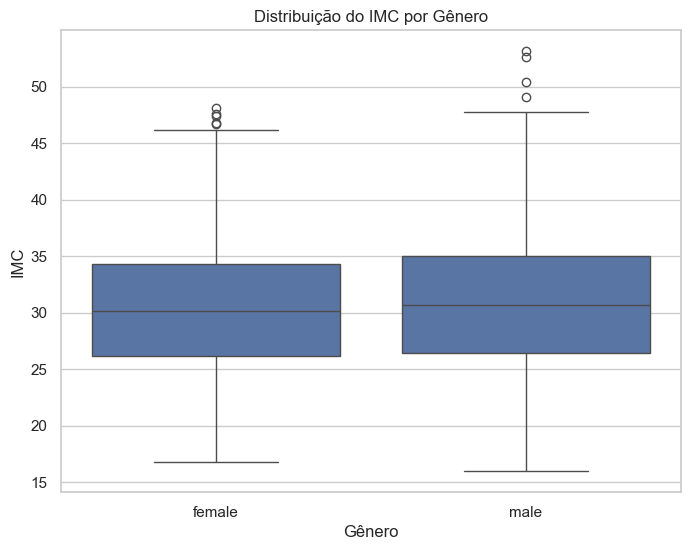

In [8]:
# Boxplot do IMC por gênero
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Distribuição do IMC por Gênero')
plt.xlabel('Gênero')
plt.ylabel('IMC')
plt.show()

Já com o gráfico contendo a distribuição do IMC por Gênero, podemos observar que o público masculino é o que tende a ter uma contagem de IMC ligeiramente maior, e também é o público que contém mais outliers para valores maiores.

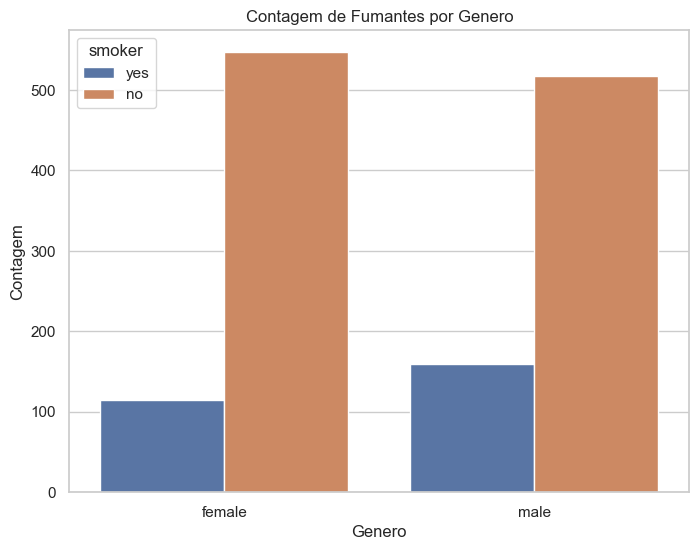

In [9]:
# Contagem de fumantes por genero
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title('Contagem de Fumantes por Genero')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.show()

Na contagem de fumantes por gênero, podes inferir dois fatos:

    1 - A maioria do público não é fumante.
    2 - A maiora dos fumantes são homens.

Até agora, podemos notar que há algumas diferenças nas distribuições entre o público feminino e masculino. 

O público masculino é a maioria entre os fumantes, o imc se mostra maior, porém são relativamente mais jovens.

O que nos leva a seguinte pergunta:

    Será que também há diferença na distribuição dos custos por gênero ?

Vamos plotar essa distribuição em um bloxplot para podermos averiguar.

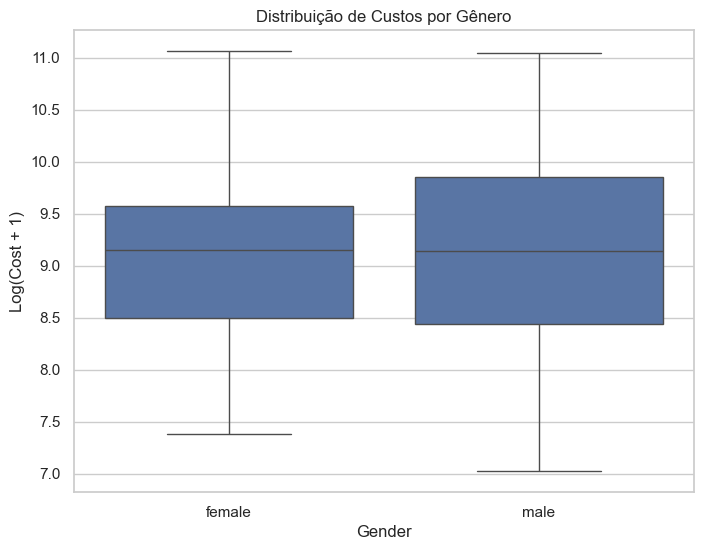

In [10]:
import numpy as np

# Transforma os valores de custos em logaritmos, afim de gerar um boxplot com visualização facilitada.
df['charges'] = np.log1p(df['charges'])

# Boxplot dos custos por genero
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Distribuição de Custos por Gênero')
plt.xlabel('Gender')
plt.ylabel('Log(Cost + 1)')
plt.show()

Com a distribuição dos custos, podemos verificar que o público masculino também gera mais custos que o feminino.

Estas diferenças nos fazem, em um primeiro momento, induzir que os custos do público masculino sempre serão maiores devido à possuirem uma maior tendência ao tabagismo e imc maior. 

Porém há outras possíveis correlações em jogo, como o fator da idade (onde o público masculino se mostra ser o mais jovem), região onde moram, quantidade de filhos e etc.

Para termos uma visão mais clara, contendo todas estas variáveis, vamos partir para uma análise de correlação.

### Análise de Correlacao

Para a análise de correlação, iremos primeiramente separar e normalizar nossos dados categóricos. 

Assim podendo executar uma análise de correlação mais precisa.

In [11]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Separa o dataframe original em dados categoricos e numericos
df_categoricos = df.select_dtypes(include=['object', 'category'])
df_numericos = df.select_dtypes(include=['number'])

# Inicializa OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplica o fit transform nos dados categoricos
one_hot_encoded = encoder.fit_transform(df_categoricos)

# Cria um DataFrame com os dados categoricos que tiveram o one hot encoding aplicado
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())

# Concatena o DataFrame de dados numericos com o DataFrame que contém o resultado do one hot encoding
df_result_one_hot_encoding = pd.concat([encoded_df, df_numericos], axis=1)

In [12]:
# Exibe as primeiras linhas para verificarmos o resultado
print(df_result_one_hot_encoding.head(5))

   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  age     bmi  \
0               0.0               0.0               1.0   19  27.900   
1               0.0               1.0               0.0   18  33.770   
2               0.0               1.0               0.0   28  33.000   
3               1.0               0.0               0.0   33  22.705   
4               1.0               0.0               0.0   32  28.880   

   children   charges  
0         0  9.734236  
1         1  7.453882  
2         3  8.400763  
3         0  9.998137  
4         0  8.260455  


In [13]:
# Exibe a quantidade de nulos gerados para validar se não foi criado um DataFrame com inconsistências
print("Quantidade de nulos:\n", df_result_one_hot_encoding.isnull().sum())

Quantidade de nulos:
 sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
age                 0
bmi                 0
children            0
charges             0
dtype: int64


Com os resultados acima, podemos verificar que além de termos transformado as variáveis categórias utlizando o one hot encoding afim de facilitar a análise de correlação. Também conseguimos manter a base íntegra.

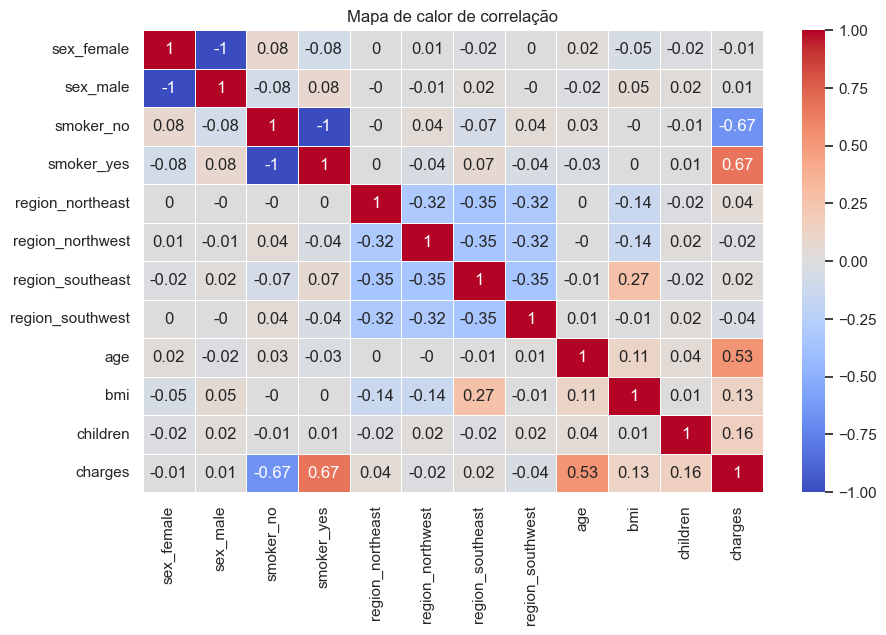

In [14]:
# Gera uma matriz de correlacao
correlation_matrix = df_result_one_hot_encoding.corr().round(2)

# Plota o heatmap da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlação')
plt.show()

Analisando as correlações acima, podemos verificar que as seguintes variáveis possuem uma forte correlação com os gastos:

    Fumante - Índice de correlação de 0.67.
    Idade - Índice de correlação de 0.53.

Houveram também variáveis com uma correlação fraca, mas que talvez possa ser considerada:

    Filhos - Índice de 0.16.
    IMC - Índice de 0.13.

Curiosamente, ao contrário do que parecia ser natural inferir ao analisar as distribuições, o gênero não mostrou ter nenhuma correlação com os custos.

Ou seja, eram os outros fatores que eram significantes (como fumar ou ter idade avançada). Caso tivéssemos precipitadamente concluído que o fator principal era o sexo (por consequência de fatores comportamentais do mesmo), poderíamos ter criado conclusões totalmente erradas que não atenderiam bem nossos clientes em um mundo real.

Outras correlações, que embora não sejam importantes para nosso cenário, se mostram interessantes:

    1 - Pessoas da região sudeste, tendem a ter um imc maior.
    2 - Pessoas mais velhas, também tendem a ter um imc maior.
    3 - Pessoas das regiões nordeste e noroeste, são as que tendem a ter um imc menor.


# Pré-processamento dos dados

Já avaliamos que a base que estamos utilizando não possui valores nulos (ausentes), portanto, não há a necessidade de limpeza de dados.

As variáveis categóricas(sex, smoker e region) já foram convertidos em formatos adequados para modelagem, utilizando o one hot enconding, para a análise de correlação.

Mas também iremos retirar os outliers de nossa base, gerando dois dataframes: um com outliers, e outro sem, assim proporcionando duas visões distinstas das execuções de nossos modelos.

### Análise de Outliers

Observando a análise de distribuições que fizemos, podemos inferir que apenas a variável de IMC possui outliers.

Porém, como temos uma base com poucas variáveis, podemos realizar o boxplot individual das variáveis numéricas, para avaliarmos se esta conclusão é real.

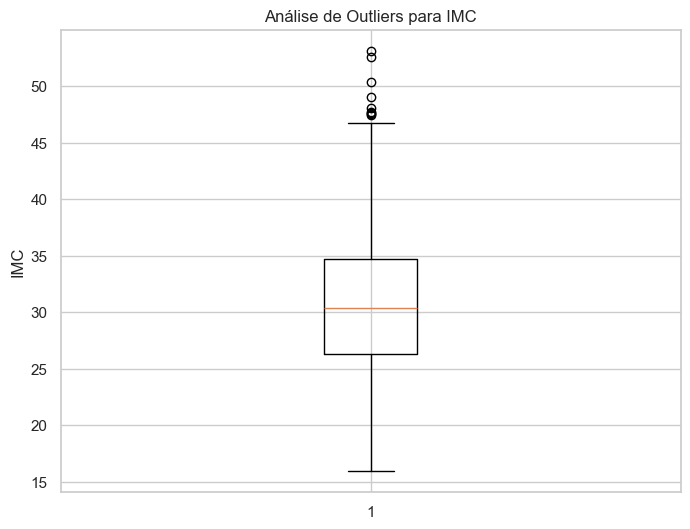

In [15]:
# Boxplot do IMC
plt.figure(figsize=(8, 6))
plt.boxplot(df['bmi'])
plt.ylabel('IMC')
plt.title('Análise de Outliers para IMC')
plt.show()

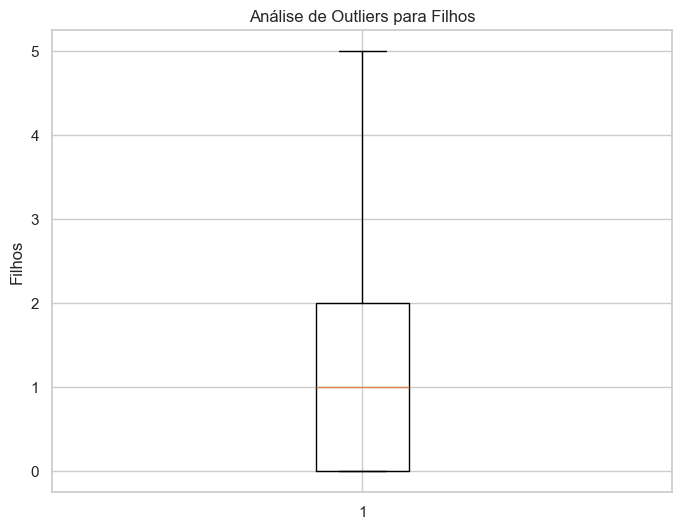

In [16]:
# Boxplot de Filhos
plt.figure(figsize=(8, 6))
plt.boxplot(df['children'])
plt.ylabel('Filhos')
plt.title('Análise de Outliers para Filhos')
plt.show()

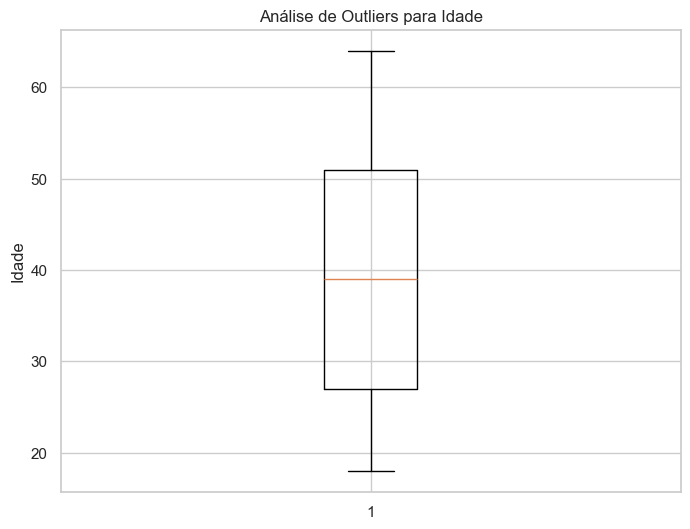

In [17]:
# Boxplot de Idade
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.ylabel('Idade')
plt.title('Análise de Outliers para Idade')
plt.show()

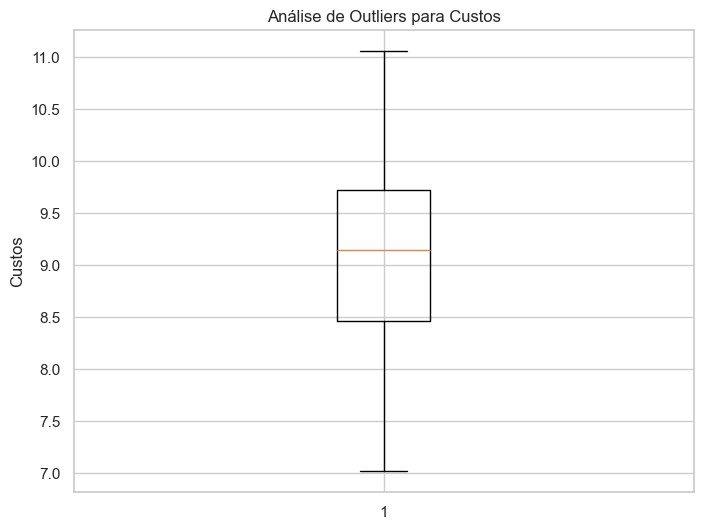

In [18]:
# Boxplot de Custos
plt.figure(figsize=(8, 6))
plt.boxplot(df['charges'])
plt.ylabel('Custos')
plt.title('Análise de Outliers para Custos')
plt.show()

Como podemos observar acima, realmente, somente a variável de IMC possui outliers.

Para complementar a análise de outliers através de boxplots acima. Vamos realizar a visualização da distribuição da variável de IMC em percentis para termos uma visualização mais precisa de onde estão os outliers e podermos definir com mais clareza os thresholds na hora de limpar nossos dados.

Primeiramente, vamos realizar a visualização da distribuição da variável de IMC em percentis, assim poderemos comparar com os resultados do bloxplot realizada na análise de outliers, 


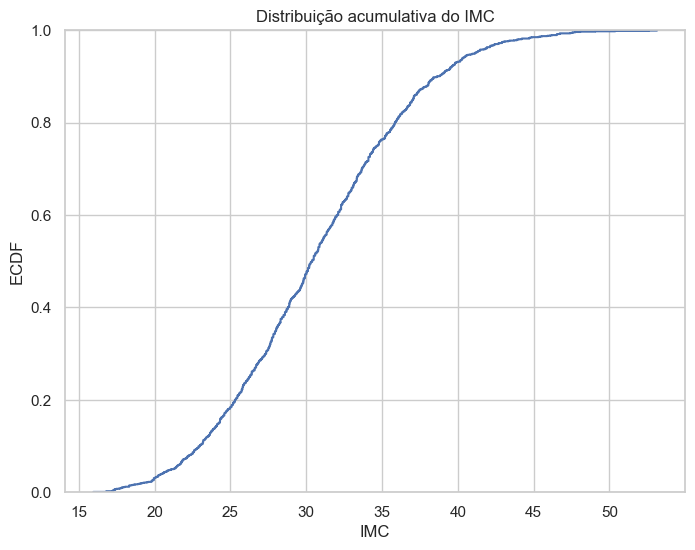

In [19]:
# Calcula os percentis
percentis = np.percentile(df_result_one_hot_encoding['bmi'], [0, 25, 50, 75, 100])

# Plota o gráfico que contém a distribuição cumulativa 
# ECDF: Proporção de ocorrências de valores até aquele valor
plt.figure(figsize=(8, 6))
sns.ecdfplot(df_result_one_hot_encoding['bmi'])
plt.title('Distribuição acumulativa do IMC')
plt.xlabel('IMC')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

O Gráfico de distribuição acumulativa acima, confirma o que o bloxplot anterior já havia nos confirmado, que a maior parte da ocorrência dos dados, se encontra até a faixa de 45 ~ 50 IMC, possuindo outliers acima desse valor. E não menor do que 15 ~ 20, sem outliers.

Podemos esperar que nosso limite para exclusão de outliers (threshold), seja algo em torno de 47 anos.

#### Removendo os outliers

Dado o dataframe "df_result_one_hot_encoding", que já possui todas as colunas (inclusive as categorias que aplicamos o one hot enconding para converter os dados categóricos em numéricos), iremos realizar a extração dos registros que possuem os outliers na variáveis de IMC.

In [20]:
# Printa a quantidade de linhas antes da remoção de outliers
row_count = len(df_result_one_hot_encoding)
print("Row count:", row_count)

Row count: 1338


In [21]:
# Separa e printa as 5 ocorrências de maior valor para o IMC
top_bmi = df_result_one_hot_encoding.nlargest(5, 'bmi')
print(top_bmi['bmi'])

1317    53.13
1047    52.58
847     50.38
116     49.06
286     48.07
Name: bmi, dtype: float64


In [22]:
# Calcula os percentis de Q1 e Q3 que serão utilizados no cálculo e a dispersão (IQR)
Q1 = df_result_one_hot_encoding['bmi'].quantile(0.25)
Q3 = df_result_one_hot_encoding['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define os limites de outlier
# Utilizaremos as formulas padrão de outliers, o resultado define quais valores serão os limites máximos para um valor ser considerado outlier ou não.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove os outliers
df_no_outliers = df_result_one_hot_encoding[(df_result_one_hot_encoding['bmi'] <= upper_bound)]

In [23]:
# Separa e printa as 5 ocorrências de maior valor para o IMC
top_bmi = df_no_outliers.nlargest(5, 'bmi')
print(top_bmi['bmi'])

438    46.75
547    46.70
454    46.53
660    46.53
930    46.53
Name: bmi, dtype: float64


Após a exclusão dos outliers, vemos que os maiores valores de imc, ficaram muito próximos da estimativa aproximada de 47 anos que fizemos após análisar os gráficos de boxplot e distribuição acumulativa do IMC.

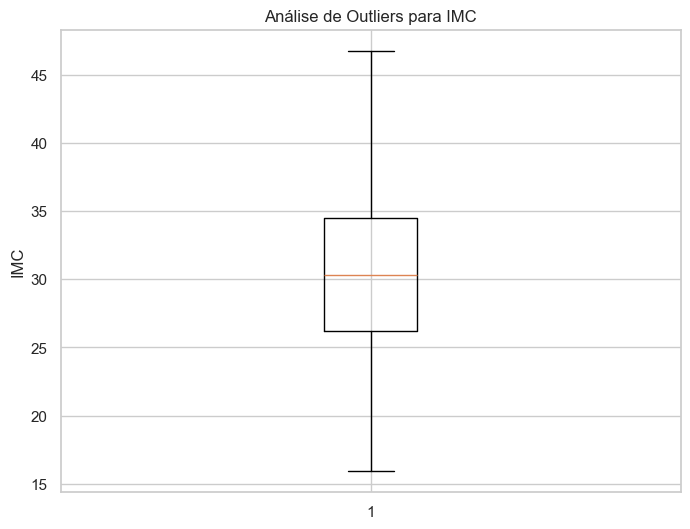

In [24]:
# Boxplot do IMC
plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['bmi'])
plt.ylabel('IMC')
plt.title('Análise de Outliers para IMC')
plt.show()

Com um novo gráfico de boxplot do IMC, podemos analisar que não possuímos mais outliers na base.

In [25]:
# Criaremos o df_outliers para facilitar o entendimento de quais bases estamos nos referindo
df_outliers = df_result_one_hot_encoding

Agora possuímos duas bases:

    1 - df_no_outliers: Base onde os outliers foram removidos.
    2 - df_outilers: Base com outliers originais.

### Normalização e padronização dos dados.

Agora, afim de ajudar a melhorar a performance de nossos algoritmos. Vamos realizar a normalização da base sem outliers e padronização da base com outliers.

Utilizaremos dois métodos diferentes de feature scaling :

    1 - Normalização - Utilizaremos o Min-Max Scaling para normalizar a base que teve os outliers removidos, dado que a normalização é mais sensível à presença de outliers.
    2 - Padronização - Utilizaremos o z-score para padronizar a base que possui outliers. Já que, a utilização do mesmo reduz o impacto dos outliers nos dados padronizados.

##### Normalização do dataset sem outliers

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Realiza o fit transform, normalizando as colunas
dados_normalizados = scaler.fit_transform(df_no_outliers)

# Converte o resultado do fit transform novamente em um data frame
df_normalizado = pd.DataFrame(dados_normalizados, columns=df_no_outliers.columns)

# Printa as informações normalizadas
print(df_normalizado)

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0            1.0       0.0        0.0         1.0               0.0   
1            0.0       1.0        1.0         0.0               0.0   
2            0.0       1.0        1.0         0.0               0.0   
3            0.0       1.0        1.0         0.0               0.0   
4            0.0       1.0        1.0         0.0               0.0   
...          ...       ...        ...         ...               ...   
1324         0.0       1.0        1.0         0.0               0.0   
1325         1.0       0.0        1.0         0.0               1.0   
1326         1.0       0.0        1.0         0.0               0.0   
1327         1.0       0.0        1.0         0.0               0.0   
1328         1.0       0.0        0.0         1.0               0.0   

      region_northwest  region_southeast  region_southwest       age  \
0                  0.0               0.0               1.0  0.021739   
1  

##### Padronização do dataframe com outliers

Para aplicar a padronização dos dados através da fórmula de z-score, antes precisaremos calcular a média e o desvio padrão dos dados:

In [27]:
# Calcula a media
media = df_outliers.mean()

#Calcula o desvio padrao
desvio_padrao = df_outliers.std()
    
# Aplica a formula padrão do Z-Score
df_padronizado = (df_outliers - media) / desvio_padrao

# Printa as informações padronizadas
print(df_padronizado)

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0       1.010141 -1.010141  -1.969850    1.969850         -0.565056   
1      -0.989221  0.989221   0.507273   -0.507273         -0.565056   
2      -0.989221  0.989221   0.507273   -0.507273         -0.565056   
3      -0.989221  0.989221   0.507273   -0.507273         -0.565056   
4      -0.989221  0.989221   0.507273   -0.507273         -0.565056   
...          ...       ...        ...         ...               ...   
1333   -0.989221  0.989221   0.507273   -0.507273         -0.565056   
1334    1.010141 -1.010141   0.507273   -0.507273          1.768415   
1335    1.010141 -1.010141   0.507273   -0.507273         -0.565056   
1336    1.010141 -1.010141   0.507273   -0.507273         -0.565056   
1337    1.010141 -1.010141  -1.969850    1.969850         -0.565056   

      region_northwest  region_southeast  region_southwest       age  \
0            -0.566206         -0.611095          1.764821 -1.438227   
1  

# Modelagem, treinamento, avaliação e validação de modelos.

Dado que estamos lidando com um problema de regressão, pois nossa base possui variáveis preditoras (idade, sexo, imc, filhos e região) e uma variável target (custos). Vamos utilizar os seguintes algoritmos:

    1 - Regressão Linear
    2 - Arvores de decisão
    3 - Random Forest
    4 - SVR

Realizaremos a validação cruzada entre eles, para definir as melhores opções.

Iremos aplicar estes modelos em nossos dois dataframes:

    1 - df_normalizado - Contém os dados normalizados através do MinMaxScaler sem outliers
    2 - df_padronizado - Contém os dados padronizados através do cálculo de Z-Score

Utilizaremos como X, os campos que através da análise correlação já realizada, concluímos terem as maiores correlações:

    1 - Fumante
    2 - Idade
    3 - Filhos
    4 - IMC

#### Função para execução da validação cruzada

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import KFold

# Funcao para realizar a validação cruzada de variaveis X e Y
def executa_valicao(X, y) :
    # Definindo os modelos a serem executados
    modelos = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Support Vector Regression': SVR()
    }

    # Definindo as métricas de score
    scores = {
        'MSE': 'neg_mean_squared_error',
        'R2': 'r2',
        'MAE': make_scorer(mean_absolute_error)
    }

    # Cria um dict com chaves para cada modelo
    resultados = {nome: {} for nome in modelos.keys()}

    # Itera cada modelo# Itera cada modelo
    for nome, model in modelos.items():
        # Itera cada métrica de score
        for metrica, metrica_score in scores.items():
            cv_scores = cross_val_score(model, X, y, cv=5, scoring=metrica_score)
            if metrica == 'MSE':
                # Multiplica o valor por -1 pois o sklearn retorna valores negativos para MSE
                resultados[nome][metrica] = -cv_scores  
            else:
                resultados[nome][metrica] = cv_scores

    # Printa os resultados
    for modelo, metricas in resultados.items():
        print(f"{modelo}:")
        for metrica, scores in metricas.items():
            print(f"  {metrica}: {np.mean(scores):.2f}")
        print()

#### Validação Cruzada dos dados normalizados

In [35]:
# Separação das variáveis em X e Y, onde os custos (charges) são o target em Y
X = df_normalizado[['smoker_yes', 'smoker_no', 'age', 'children', 'bmi']] 
y = df_normalizado['charges'] 

# Executa a validação cruzada do dataset normalizado
executa_valicao(X, y) 

Linear Regression:
  MSE: 0.01
  R2: 0.76
  MAE: 0.07

Decision Tree:
  MSE: 0.02
  R2: 0.62
  MAE: 0.07

Random Forest:
  MSE: 0.01
  R2: 0.78
  MAE: 0.06

Support Vector Regression:
  MSE: 0.01
  R2: 0.78
  MAE: 0.08



#### Validação Cruzada dos dados Padronizados

In [30]:
X = df_padronizado[['smoker_yes', 'smoker_no', 'age', 'children', 'bmi']]  
y = df_padronizado['charges'] 

# Executa a validação cruzada do dataset normalizado
executa_valicao(X, y) 

Linear Regression:
  MSE: 0.24
  R2: 0.76
  MAE: 0.31

Decision Tree:
  MSE: 0.38
  R2: 0.63
  MAE: 0.31

Random Forest:
  MSE: 0.22
  R2: 0.78
  MAE: 0.25

Support Vector Regression:
  MSE: 0.18
  R2: 0.82
  MAE: 0.19



# Relatório de análise de resultados

Dado os resultados das validações cruzadas, as melhores opções de algoritmo seriam:

    1 - Random Forest com dados normalizados que não incluem outliers, pois apresenta:
        * Menor MSE (0.01) -> Houveram menos erros de predição
        * Maior R2 (0.78) -> Explica uma maior variação dos dados
        * Menor MAE (0.06) -> Possui uma meno média de erros. 

        OBS: Apesar de terem acontecido empates nos valores de MSE e R2, o menor MAE acabou sendo o diferencial para escolhermos como o melhor algoritmo.
    
    2 - SVR com dados padronizados que incluem outliers pois apresenta:
        * Menor MSE (0.18) -> Houveram menos erros de predição
        * Maior R2 (0.82) -> Explica uma maior variação dos dados
        * Menor MAE (0.19) -> Possui uma meno média de erros.

Porém entre o melhor algoritmo com dados normalizados, e o melhor algoritmo com dados padronizados. Qual seria o melhor ?

Realizando uma comparação entre o conjunto de valores dos dois resultados, podemos verificar o seguinte:

    Random Forest:
        1 - Possui um MSE de 0.01, que é consideravelmente menor do que o valor de 0.18 apresentado pelo SVR. Ou seja, possui melhor assertividade em suas previsões.
        2 - Possui um R2 de 0.78, que é menor do que os valor de 0.82 apresentado pelo SVR. Ou seja, possui menor capacidade de explicar maior variancia nos dados.
        2 - Possui um MAE de 0.06, que é consideravelmente menor do que o valor de 0.19 apresentado pelo SVR. Ou seja, possui um índice geral menor de erros.

A partir dos resultados acima, podemos concluir que, apesar de possuir um R2 menor do que o algoritmo SVR. O Random Forest foi melhor em 2 de 3 métrias de performance.

Levando à conclusão de que em um quadro geral, para o nosso cenário. O algoritmo de Random Forest aplicado em uma base normalizada que possui outliers, possui uma performance melhor. 

Portanto, sendo a escolha mais adequada para usos futuros. 

Critérios utilizados:

    * MSE = Erro Quadrático Médio, mostra a diferença média entre os valores preditos e os valores reais. Quanto mais próximo de 0, maior a quantidade de acertos.
    * R2 = R-Squared, indica o quão bem o modelo explica uma variação de dados. Varia entre 0 e 1, quanto mais próximo de 1, maior a performance.
    * MAE = Erro Médio Absoluto, mede a média de erros absolutos das previsões. Quanto mais próximo de 0, maior a quantidade de acertos.

#### Gráficos

Afim de validarmos nossas conclusões realizadas acima. Vamos gerar dois gráficos do tipo scatter plot, que demonstrarão a relação das previsões realizadas vs valores reais 
para os dois melhores algoritmos selecionados (Random Forest em dados normalizados sem outliers, e SVR em dados padronizados com outliers).

##### Execução do Random Forest com dados normalizados (sem outliers)

In [31]:
# Separação das variáveis em X e Y, onde os custos (charges) são o target em Y
X = df_normalizado[['smoker_yes', 'smoker_no', 'age', 'children', 'bmi']] 
y = df_normalizado['charges'] 

# Separa a base em testes e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treina Random Forest
r_modelo = RandomForestRegressor()
r_modelo.fit(X_train, y_train)

# Executa as predicoes
r_predicoes = r_modelo.predict(X_test)

# Cria um dataframe com os resultados reais e as predicoes
df_reais_predicoes_rf = pd.DataFrame({'Real': y_test, 'Predito': r_predicoes})


##### Execução do SVR com dados padronizados (com outliers)

In [32]:
X = df_padronizado[['smoker_yes', 'smoker_no', 'age', 'children', 'bmi']]  
y = df_padronizado['charges'] 

# Separa a base em testes e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treina SVR
svr_modelo = SVR()
svr_modelo.fit(X_train, y_train)

# Executa predições
svr_predicoes = svr_modelo.predict(X_test)

# Cria um dataframe com os resultados reais e as predicoes
df_reais_predicoes_svr = pd.DataFrame({'Real': y_test, 'Predito': svr_predicoes})

##### Exibe gráficos com resultados reais vs predições

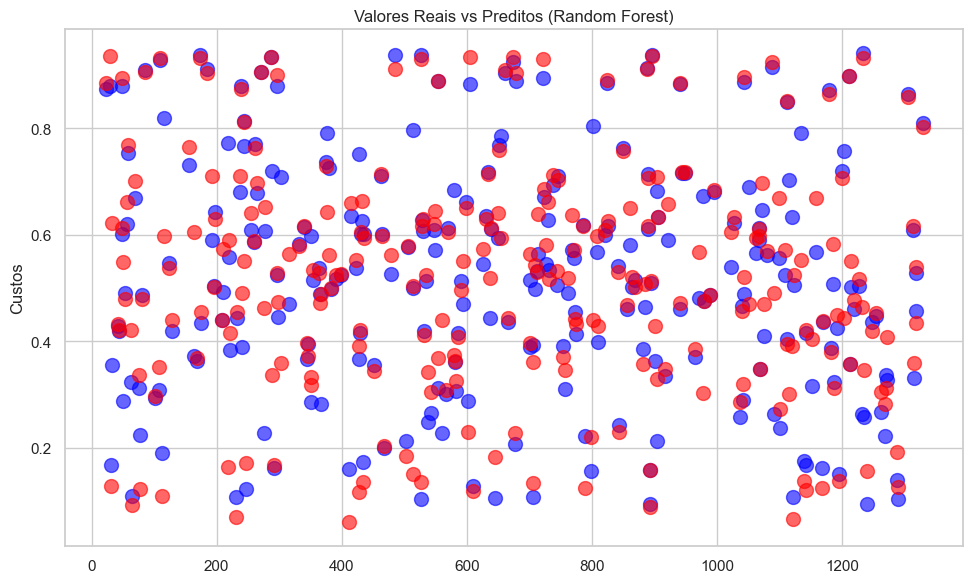

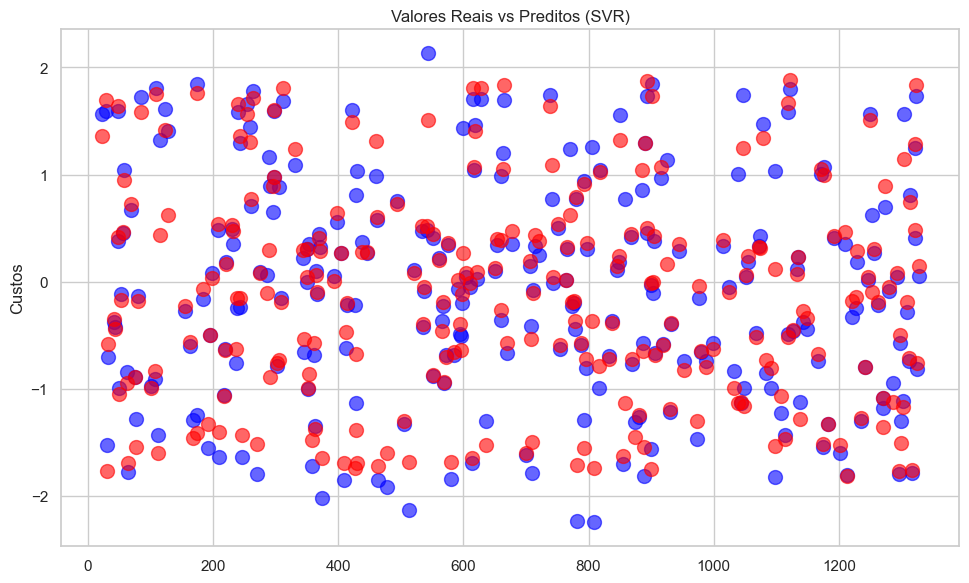

In [33]:
# Definindo o grafico
plt.figure(figsize=(10, 6))
plt.title('Valores Reais vs Preditos (Random Forest)')
plt.ylabel('Custos')
plt.tight_layout()

# Configura o scatter para valores reais
plt.scatter(df_reais_predicoes_rf.index, df_reais_predicoes_rf['Real'], color='blue', label='Reais', s=100, alpha=0.6)
# Configura o scatter para valores preditos
plt.scatter(df_reais_predicoes_rf.index, df_reais_predicoes_rf['Predito'], color='red', label='Preditos', s=100, alpha=0.6)

plt.show()

# Definindo o grafico
plt.figure(figsize=(10, 6))
plt.title('Valores Reais vs Preditos (SVR)')
plt.ylabel('Custos')
plt.tight_layout()

# Configura o scatter para valores reais
plt.scatter(df_reais_predicoes_svr.index, df_reais_predicoes_svr['Real'], color='blue', label='Reais', s=100, alpha=0.6)
# Configura o scatter para valores preditos
plt.scatter(df_reais_predicoes_svr.index, df_reais_predicoes_svr['Predito'], color='red', label='Preditos', s=100, alpha=0.6)

plt.show()

A partir dos resultados acima, podemos concluir que os dois modelos selecionados tiveram uma performance bem próxima.

Porém utilizar uma base mantendo outliers com o algoritmo de random forest ainda aparenta ser mais adequada para nosso cenário, pois podemos perceber que há mais 'hits' nas partes de cima de de baixo do gráfico.

Enquanto para uma base sem outliers e aplicação do SVR, os valores preditos e os acertos, tendem a estar mais ao centro do gráfico. 

# Conclusão Final

Durante o decorrer deste trabalho, pudemos utilizar e avaliar diversos métodos para exploração de dados, modelagem, treinamento e avaliação de modelos, e validações.

Onde pudemos desenvolver um modelo que faz predições de custos médicos individuais a partir de informações fornecidas.

Escolhemos o algoritmo de Random Forest utilizando uma base com outliers, como a melhor opção para realização das predições.

Durante o processo, tivemos a oportunidade de ter insights a cada etapa:

#### Análise Exploratória

Durante a análise exploratória dos dados, utilizamos técnicas para carregar a base, verificar se há insconsistências, realizar análise de ditribuições e de correlação.

Onde, pudemos obter alguns insights sobre correlação.

Ao fim da análise, ao olharmos para os números e gráficos, percebemos como nossas percepções e vieses podem acabar afetando todo o decorrer de uma análise.

Já que, curiosamente ao contrário do que parecia ser natural inferir ao analisar as distribuições, o gênero não mostrou ter nenhuma correlação com os custos.

Ou seja, outros fatores que eram significantes (como fumar ou ter idade avançada). Caso tivéssemos precipitadamente concluído que o fator principal de correlação com o custo, era o sexo (por consequência de fatores comportamentais do mesmo), 
poderíamos ter criado conclusões totalmente erradas que não atenderiam bem nossos clientes em um mundo real.

Outras correlações, que embora não sejam importantes para nosso cenário, se mostraram interessantes para outros tipos de análises futuras onde poderíamos reaproveitar a mesma base:

    1 - Pessoas da região sudeste, tendem a ter um imc maior.
    2 - Pessoas mais velhas, também tendem a ter um imc maior.
    3 - Pessoas das regiões nordeste e noroeste, são as que tendem a ter um imc menor.

#### Pré-processamento de dados

Durante a fase de pré-processamento de dados, realizamos a análise de outliers e decidimos por tomar dois caminhos possíveis: um com outliers e outro sem. 

Onde tivemos que utilizar diferentes técnicas como normalização utilizando o Min-Max Scaling e padronização utilizando o Z-Score para tratarmos diferentemente as bases que se tornaram diferentes, simplesmente pela escolha
de mantermos os outliers em uma e não em outra.

#### Modelagem, treinamento, avaliação e validação de modelos

Ao executarmos a fase final do projeto, visualizamos como os diferentes modelos performam e reagem diferentemente à situações diferentes. 

Onde, desde os dados que desejamos avaliar, o objetivo almejado, a base e sua disponibilidade e volume de informações.  

E, até as escolhas que fazemos no decorrer do caminho para análise e tratamento dos dados demonstrar ter impactos significativos nos resultados que obteremos.

Nos deixando com algumas questões latentes:

    * Será que exploramos nossos dados da maneira correta ?
    * Nossa compreensão de negócio a partir das dados explorados, estava coerente ?
    * Tratamos nossos dados da melhor maneira para a base em questão ?
    * Escolhemos os melhores algoritmos para responder às nossas perguntas ?

Fica evidente, que não há um único melhor caminho para a solução. Sempre existirão diversas maneiras de se realizar o proposto. 

Afinal, uma interpretação minimamente dissemelhante do significado de uma informação, pode acarretar em procedimentos, técnicas e necessidades totalmente diversas.

Ficando como conclusão final, de que devemos estar sempre abertos à revisitar nossas ideias, axiomas, técnicas e metodologias afim de encontrarmos melhores maneiras de atingir nossos objetivos.



